# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [21]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [22]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **
- `'RM'`: An increase in the number of rooms should generally increase the value of the house. Bigger houses with more rooms can house more people or give people more space, so will be more valuable. At least in the range of most common number of rooms I would expect a direct correlation between `'RM'` and price. For very large number of rooms the prices might not, however, follow a clear linear correlation.
- `'LSTAT'`: Here I would expect a decrease in price as `'LSTAT'` increases. A larger portion of lower class people in the area might make a neighborhood and therefore a house less valuable. Reasons might be general atmosphere, state of the neighborhood, possibly even crime rate etc.
- `'PTRATIO'`: Here I would expect some dependency. As the ratio of pupils to teachers in the area increases houses houses might be less valuable. `'PTRATIO'` might be considered a proxy for quality of schooling, which in itself is an important factor for families in buying a house. Obviously, not all potential buyers have children in school, so overall the factor `'PTRATIO'` might not be a very strong driver of prices.

To test our intuition or general experience we plot the data for each of the three parameters against prices:

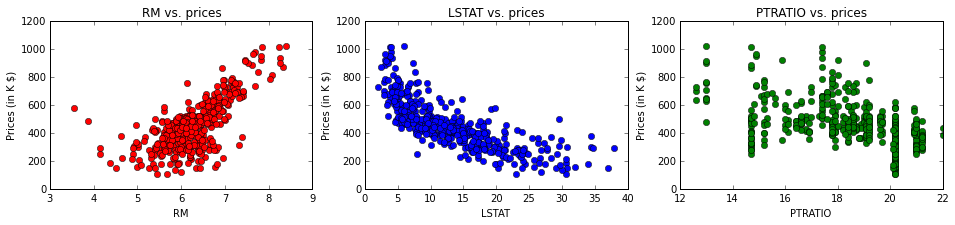

In [23]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(16,3))
axes[0].plot(features.RM, prices/1e3,'ro')
axes[0].set_title('RM vs. prices')
axes[0].set_ylabel('Prices (in K $)')
axes[0].set_xlabel('RM')
axes[1].plot(features.LSTAT, prices/1e3,'bo')
axes[1].set_title('LSTAT vs. prices')
axes[1].set_ylabel('Prices (in K $)')
axes[1].set_xlabel('LSTAT')
axes[2].plot(features.PTRATIO, prices/1e3,'go')
axes[2].set_title('PTRATIO vs. prices')
axes[2].set_ylabel('Prices (in K $)')
axes[2].set_xlabel('PTRATIO')

The observations are very much in line with the ansers above. There is correlation between `'RM'` and prices and an inverse correlation between `'LSTAT'` and prices. The dependency of prices on `'PTRATIO'` is possibly even less than anticipated. The data only shows a relatively mild trend between increasing `'PTRATIO'` and decreasing prices.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [24]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [25]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
The R^2 value of 0.923 can be considered quite good, so the model predictions capture the model relatively well. However, the predictions tend to be larger than the true values (4 out of 5 predictions are larger than the respective true value), so there might be somewhat better models with even larger R^2.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [26]:
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=33)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

Essentially every machine learning algorithm/model will need to make good approximations on data it was not explicitly trained on. If we were to use a model without validating it on available (and independent) test data there is little security that the model does work well enough.

One example of a potential issue is overfitting. Using a rather complex model on the available training data might yield high accuracy of the model on the training data that could only be achieved because the model is heavily tailored to the input data (variance). Using the resulting model on other data would lead to large errors (see e.g. fitting higher order polynomials to input data).

Checking a models performance on testing data (that it has not "seen" before) gives a good indication of potential production performance.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

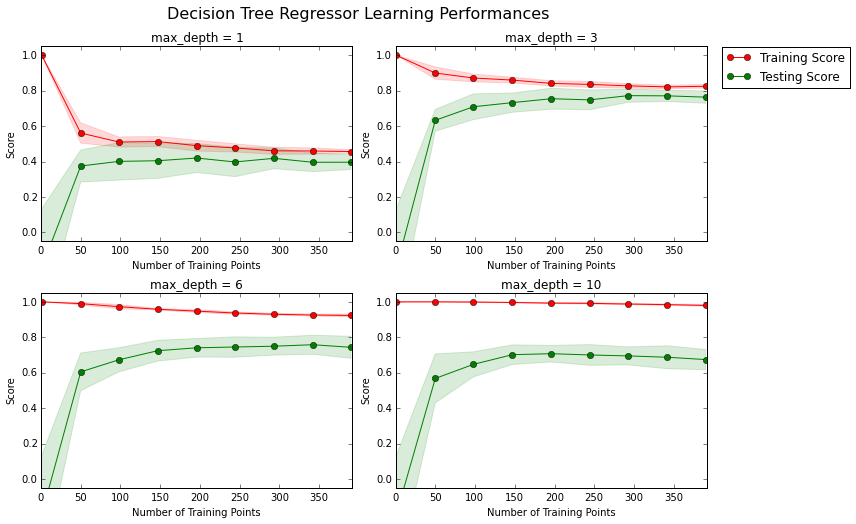

In [27]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

##### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

I will look at the graph with `'max_depth = 6`'. Here we are talking about a mid to higher model complexity. The accuracy of the model on the training set diminishes slightly as the number of training points increases, reaching a limit value of around 0.9-0.95, which I would consider relatively good.

On the other hand the accuracy on the testing points increases from around 0.6 for 50 point to around 0.7-0.75 for larger number of training points. This also seems to be a limit value (under the shown uncertainty of the line itself). This `'max_depth`' value already seems to imply mild overfitting: there is a clear gap between the training score and the test score.

Further increasing the number of training points here would not improve the situation as both graphs are relatively stable from around 200 training points onwards.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

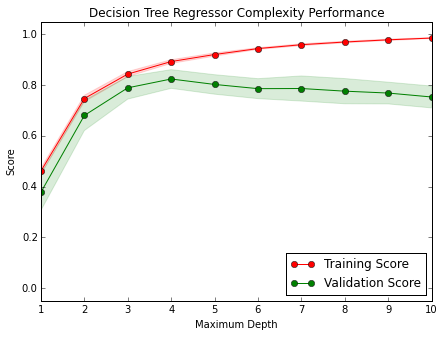

In [28]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

For `'max_depth = 1`' the model clearly suffers from high bias: it is too limited to even do well on the training set (training score of around 0.4). The data is too complex for the model to represent the training data.

For `'max_depth = 10`' on the other hand, the model does suffer from high variance. Here the model almost perfectly represents the training data (training score of close to 1). However, the performance on the testing set is clearly worse at score of < 0.8. This implies that the trained model is too sensitive on the training data.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

My choice for the best `'max_depth`' value is 4. This value yields the maximum testing performance (around 0.8), with a reasonable training performance of around 0.85 - 0.9. Below `'max_depth = 4`' we have high bias (low training score). Beyond `'max_depth = 4`' high variance shows: as the model becomes more complex the training data is better represented, to the degree that the model depends too much on it. This results in decreasing testing performance.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

The grid search technique is based on cross validation and allows us to find good parameters for a learning algorithm (e.g. kernel choice, numeric parameters etc.). We would run cross validation on a grid of parameter combinations (e.g. kernel 1 and parameter 1, then kernel 1 and parameter 2 etc.) to compute the score for each point in the grid. The grid point with the best score represents the best parameter combination (for the available data).

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

In k-fold cross-validation we divide the available data into k subsets (equal size). We the run k different training experiments: the first one (for example) with the union of the subsets 1 - k-1 as training data and the subset k as testing data. For each of the k experiments we compute the test score and take the average. This average is then the overall test result.

In grid search we rely on (possibly small) differences in testing performance of different models (different parameter sets). Therefore we need to make the most of our available data (k-fold cross validation does that) and we need to make sure the test results we get are reliable and actually comparable. Reliability is enhanced by averaging over different experiments and comparability by treating every parameter set the same way: all of them are trained and tested the k-fold way. 

If we were to use only a single choice of training and testing set it might just happen that a parameter set in grid search accidentally does well on this specific choice, whereas it does worse in other situations. So if we used this parameter set we would be worse off although grid search said something different. k-fold cross validation minimizes this danger.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [29]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [30]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The **optimal `'max_depth`'** of the model given by grid search is **4**, which is the same value as we identified by looking at complexity graphs before.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [31]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $409,400.00
Predicted selling price for Client 2's home: $229,682.35
Predicted selling price for Client 3's home: $938,053.85


**Answer: **

To recap: The statistics calculated earlier are: Minimum price: `$` 105,000.00, Maximum price: `$` 1,024,800.00, Median price `$` 438,900.00.

I would recommend asking prices of \$ 410,000, \$ 230,000 and \$ 940,000, respectively. Are these prices reasonable?

- **Client 1**: \$ 410,000 is just in the lower third of the price range. For a 5-room house in a middle class area (`'LSTAT`'=17%) with a medium student-teacher ratio that seems somewhat reasonable.
On the other hand, looking at the plot of `'RM`' vs. prices above (Question 1) I would say that \$ 410,000 for a 5-room house is definitely on the higher side. The same holds when we consider `'LSTAT`': for the value of 17% that seems a price above average.


- **Client 2**: \$ 230,000 is on the lower end of the price spectrum. That seems to be justified given that the house only has 4 rooms and seems to be in an area with a significant share of lower class neighbors (35% is close to the maximum `'LSTAT`' value in the original data).


- **Client 3**: \$ 940,000 is on the upper end of the spectrum. Again, this seems justified given 8 rooms, a very low share of lower income neighbors as well as a very good student-to-teacher ratio of 12. The price appears justified when looking at the diagrams of `'RM`' and `'LSTAT`' vs. price under question 1. Houses with 8 rooms cost in the range of \$ 800k-1000k according to the original data.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [32]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $422,100.00
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $428,316.00
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $28,652.84


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

- Data collected about 40 years ago has limited relevance today (even if inflation was accounted for). A lot of factors determining prices may have changed significantly throughout time:
  - Housing demand: Is Boston an upcoming city drawing in people from outside)
  - Housing supply: How much housing development has taken place since then?
  - Shift of prosperity within the city: Have certain areas of the city become more or less fashionable?
  - Standard sizes of houses: Have recent developments been larger on average?
  - ...
  So the model can mainly serve as a rough guidance if applied today.


- The chosen feature are relevant as we saw throughout the exercise (`'PSRATIO`' possibly being the least relevant) and a lot of information can be gained from looking at them. However, for a model to actually serve in price recommendations we would require further features: overall living area (square feet) of the house, garden area (if available), access to public transport or parking, something about the development of the neighborhood (e.g. average annual price increase in %), ...


- Looking at the result of the sensitivity analysis above I would say the model is actually relatively robust (10% uncertainty is alright). The limited number of features does result in quite a range in prices. So more features are required if price recommendations are to be specific enough.


- Data collected in Boston is not useful or applicable in rural areas (probably not even in other major cities in the US). Too much local information is contained in the data. Price ranges are very specific to different cities from my experience (in Europe/UK). One of the main drivers of overall house prices (besides supply/demand) is the attractiveness of a city as a place for employment or education. This certainly differs between Boston and a rural city.